3. Import Libraries  
• Create a code block to import the following libraries: 
o numpy as np 
o pandas as pd  
o matplotlib.pyplot as plt 
o statsmodels 
o statsmodels.api as sm 
o seaborn as sns 
o Set the plt.style.use to ‘seaborn’

In [1]:
#CodeBlock Section 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

plt.style.use('seaborn')

4. Import Data 
• Create a code block to import ‘Real Estate Data.csv’ as df_realestate  with index_col 
= 0 and header=0. (Note, the path should be similar ‘data/Real Estate Data – 
Week 3.csv’.)

In [2]:
# CodeBlock Section 4
df_realestate = pd.read_csv('data/Real Estate Data - Week 3.csv', index_col = 0, header = 0 )

• Create a code block and execute to view the info for df_realestate. 

In [3]:
# CodeBlock Section 4
df_realestate.info

<bound method DataFrame.info of              Dwelling Type  Lot Frontage  Lot Area Alley Land Contour  \
Id                                                                      
1     2-STORY 1946 & NEWER          65.0      8450   NaN        Level   
2     1-STORY 1946 & NEWER          80.0      9600   NaN        Level   
3     2-STORY 1946 & NEWER          68.0     11250   NaN        Level   
4     2-STORY 1945 & OLDER          60.0      9550   NaN        Level   
5     2-STORY 1946 & NEWER          84.0     14260   NaN        Level   
...                    ...           ...       ...   ...          ...   
1456  2-STORY 1946 & NEWER          62.0      7917   NaN        Level   
1457  1-STORY 1946 & NEWER          85.0     13175   NaN        Level   
1458  2-STORY 1945 & OLDER          66.0      9042   NaN        Level   
1459  1-STORY 1946 & NEWER          68.0      9717   NaN        Level   
1460  1-STORY 1946 & NEWER          75.0      9937   NaN        Level   

        Neighborho

Section 5a: Create the X and y datasets and Simple Regression 
• Create a code block and create new datasets: 
o X = ‘Living Area Above Grade’ 
o y = ‘Sale Price’ 

In [4]:
# CodeBlock Section 5a1
X = df_realestate['Living Area Above Grade']
y = df_realestate['Sale Price']

• Create a code block and execute a simple regression using statsmodels. Make sure 
to include the following (Figure 2 shows a blurred screenshot to show the structure): 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
   (Make sure that you have the X and y in the correct location.) 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results.  


In [5]:
# CodeBlock Section 5a2

X = df_realestate['Living Area Above Grade']
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()


C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1199.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          7.76e-190
Time:                        19:19:44   Log-Likelihood:                -17076.
No. Observations:                1390   AIC:                         3.416e+04
Df Residuals:                    1388   BIC:                         3.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.369e+04   4485.277      7.511      0.000    2.49e+04    4.25e+04
Living Area Above Grade    96.9264      2.800     34.620      0.000      91.434     102.419
==============================================================================
Omnibus:                      180.493   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.914
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       8.493   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

• Create a code block that creates a table that includes the following columns and 
name it df_reg. 
o ‘Living Area Above Grade’ from df_realestate 
o ‘Sale Price’ from df_realestate 
  

In [6]:
# CodeBlock Section 5b1
df_reg = df_realestate[['Living Area Above Grade', 'Sale Price']]

df_reg.head()

,Living Area Above Grade,Sale Price
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


• Create a code block to rename columns in df_reg, then view the .head(10) for 
df_reg: 
o 0 to 'Sale Price Predicted' 
o 1 to 'Residual'

In [7]:
# CodeBlock Section 5b2

df_reg = pd.concat([df_reg,pred,resid], axis=1)
df_reg.head(10)

,Living Area Above Grade,Sale Price,0,1
Id,,,,
1,1710,208500,199432.115140,9067.884860
2,1262,181500,156009.099394,25490.900606
3,1786,223500,206798.519597,16701.480403
4,1717,140000,200110.599761,-60110.599761
5,2198,250000,246732.185862,3267.814138
6,1362,143000,165701.736837,-22701.736837
7,1694,307000,197881.293149,109118.706851
8,2090,200000,236264.137424,-36264.137424
9,1774,129900,205635.403103,-75735.403103


• Create a code block to rename columns in df_reg, then view the .head(10) for 
df_reg: 
o 0 to 'Sale Price Predicted' 
o 1 to 'Residual'

In [8]:
# CodeBlock Section 5b3
df_reg = df_reg.rename(columns = {0:'Sale Price Predicted', \
                                               1: 'Residual'})
df_reg.head(10)

,Living Area Above Grade,Sale Price,Sale Price Predicted,Residual
Id,,,,
1,1710,208500,199432.115140,9067.884860
2,1262,181500,156009.099394,25490.900606
3,1786,223500,206798.519597,16701.480403
4,1717,140000,200110.599761,-60110.599761
5,2198,250000,246732.185862,3267.814138
6,1362,143000,165701.736837,-22701.736837
7,1694,307000,197881.293149,109118.706851
8,2090,200000,236264.137424,-36264.137424
9,1774,129900,205635.403103,-75735.403103


• Create a code block that create a regplot for ‘Living Area Above Grade’ and ‘Sales 
Price (See Figure 1).  Include: 
o x is 'Living Area Above Grade' 
o y is 'Sale Price' 
o data is df_reg,  
o scatter_kws={"color":"green","alpha":0.15,"s":50}, 
o line_kws={'color': 'black'}) 
o Title is  'Regression Fit Plot for Sale Price and Living Area' with font size of 
18pt. and centered. 
o xlabel is 'Living Area Above Grade' with font size of 14pt. and centered. 
o ylabel is 'Sale Price' with font size of 14pt. and centered.

Text(0, 0.5, 'Sale Price')

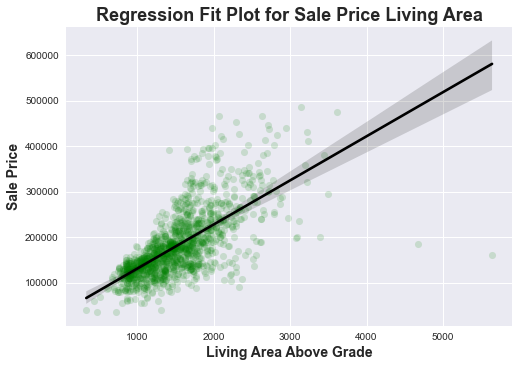

In [9]:
# CodeBlock Section 5c1 Regplot
sns.regplot( x='Living Area Above Grade', y='Sale Price', data= df_reg, scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Sale Price Living Area', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Living Area Above Grade', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

• Create a code block that create a residplot for ‘Living Area Above Grade’ and ‘Sales 
Price.  Make the residplot similar to Figure 4 (similar does not mean exact, but the 
structure and labeling should be very similar).

Text(0, 0.5, 'Sale Price')

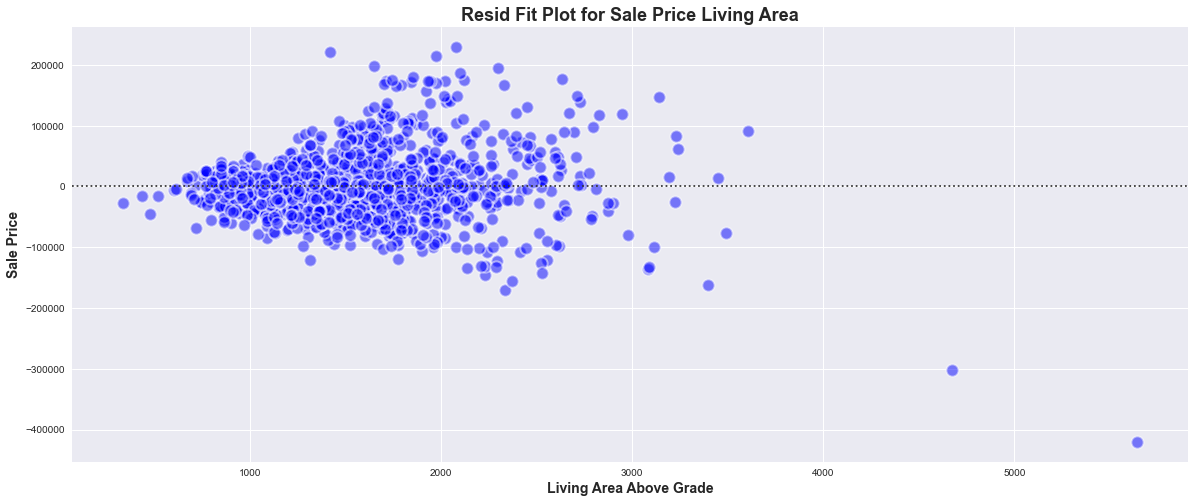

In [10]:
# CodeBlock Section 5d1 Residplot

plt.figure(figsize=(20,8))
sns.residplot(x='Living Area Above Grade', y='Sale Price', data = df_reg, scatter_kws={"color":"blue","alpha":
0.5,"s":150, "linewidth":2,"edgecolor":"white"}, 
           line_kws={'color': 'black'})

plt.title('Resid Fit Plot for Sale Price Living Area', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Living Area Above Grade', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')


• Create a code block that creates a lmplot with the following properties  
(See Figure 5): 
o x is 'Living Area Above Grade' 
o y is 'Sale Price' 
o col is ‘Garage Cars’ 
o col_wrap is 2 
o data is df_realestate  
o palette is "Set1",  
o aspect is 2, 
o scatter_kws={"alpha":0.15,"s":150,"linewidth":2,"edgecolor":"white"}, 

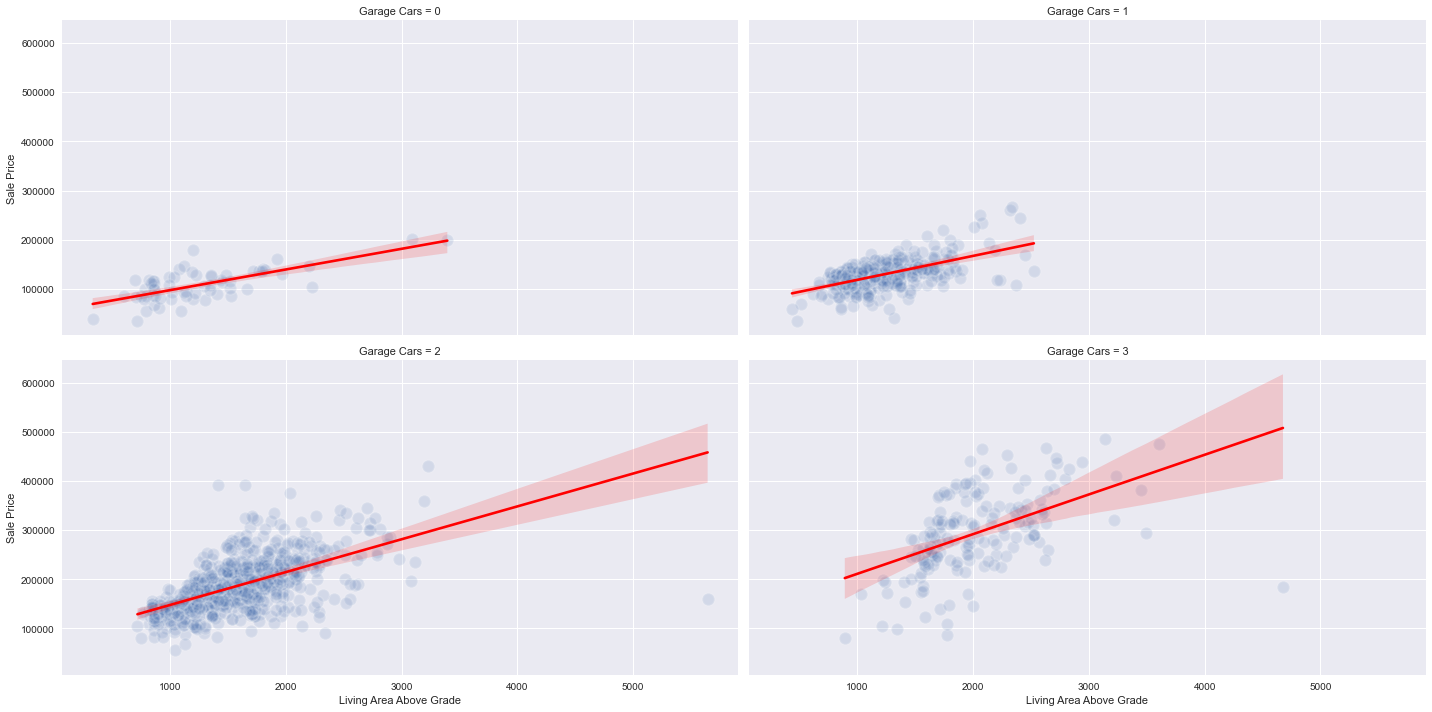

In [11]:
# CodeBlock Section 5e implot
sns.lmplot( x='Living Area Above Grade', y='Sale Price', data= df_realestate, col='Garage Cars', line_kws={'color': 'red'}, aspect = 2, palette = "Set1", col_wrap = 2, scatter_kws={"alpha":0.15, "s":150,"linewidth":2,"edgecolor":"white"} )


# CodeBlock Section 5f: Explanation of Simple Regression Results


What is the relationship between feature and target variable? In the OLS Summary we have the Sale Price as the target variable. Living Above Grade is the feature variable. The slope of the line for the feature variable(Living Above Grade) is 96.9264. The intercept of the line is 3.369e+04. The confidence level is 95% (0.975-0.025). There is a 5% of error that is distributed symmetrically with 2.5% chance the true value is smaller then the lower bound while 2.5% chance the true value is larger than the upper value. The bounds for the intercept are 2.49e+04 and 4.25e+04. The bounds for the slope are 91.434 and 102.419.

The R squared and adjusted R squared are both 0.463 which indicates that they have a weak relationship as it is less than 0.5.

What does the plots tell you about the relationship?
People are willing to pay a higher sale price when the square footage for living area above grade goes from 1000 to 2000 square feet. However when the square footage increases beyond 2000 square feet, there is less willingness to pay a higher price for the increased square footage; this is supported by the weak coefficient of correlation of 0.463.

• Create a code block and execute a multiple regression using statsmodels, which is 
similar to the simple regression from Section 5a, except: 
o X includes ‘Living Area Above Grade’ and ‘Garage Cars 
o Use y and X to fit the model and name the model reg2. 
o Use X to predict with the model and name it pred2. 
o Use the model (reg) to create the residuals and name it resid2. 
o Show a summary of the results.

In [12]:
# CodeBlock Section 6a
X = df_realestate[['Living Area Above Grade','Garage Cars']]
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg2 = sm.OLS(y, X).fit()
pred2 = reg2.predict(X)
resid2 = reg2.resid
reg2.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.79e-292
Time:                        19:19:48   Log-Likelihood:                -16837.
No. Observations:                1390   AIC:                         3.368e+04
Df Residuals:                    1387   BIC:                         3.370e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2366.5055   4067.359     -0.582      0.561   -1.03e+04    5612.334
Living Area Above Grade    68.6612      2.638     26.029      0.000      63.487      73.836
Garage Cars              4.436e+04   1857.324     23.885      0.000    4.07e+04     4.8e+04
==============================================================================
Omnibus:                      151.685   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.044
Skew:                           0.084   Prob(JB):                    1.31e-267
Kurtosis:                       7.604   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Section 6b: Create a Regression Table for Multiple Regression 
• Create a code block that creates a table that includes the following columns and 
name it df_reg2. 
o ‘Living Area Above Grade’ from df_realestate 
o ‘Garage Cars’ from df_realestate 
o ‘Sale Price’ from df_realestate

In [13]:
# CodeBlock Section 6b1
df_reg2 = df_realestate[['Living Area Above Grade', 'Garage Cars','Sale Price']]

df_reg2.head()

,Living Area Above Grade,Garage Cars,Sale Price
Id,,,
1,1710,2,208500
2,1262,2,181500
3,1786,2,223500
4,1717,3,140000
5,2198,3,250000


• Create a code block to concatenate df_reg2, pred2, and resid2 and use the name 
df_reg2 as the final dataset. View the .head(10) for df_reg2. 

In [14]:
# CodeBlock Section 6b2
df_reg2 = pd.concat([df_reg2,pred2,resid2], axis=1)
df_reg2.head(10)

,Living Area Above Grade,Garage Cars,Sale Price,0,1
Id,,,,,
1,1710,2,208500,203768.988587,4731.011413
2,1262,2,181500,173008.762367,8491.237633
3,1786,2,223500,208987.241249,14512.758751
4,1717,3,140000,248612.021697,-108612.021697
5,2198,3,250000,281638.068152,-31638.068152
6,1362,2,143000,179874.884291,-36874.884291
7,1694,2,307000,202670.409079,104329.590921
8,2090,2,200000,229860.251899,-29860.251899
9,1774,2,129900,208163.306619,-78263.306619


o Rename column heading to match Figure 6.

In [15]:
# CodeBlock Section 6b2 continued
df_reg2 = df_reg2.rename(columns = {0:'Sale Price Predicted', \
                                               1: 'Residual'})
df_reg2.head(10)

,Living Area Above Grade,Garage Cars,Sale Price,Sale Price Predicted,Residual
Id,,,,,
1,1710,2,208500,203768.988587,4731.011413
2,1262,2,181500,173008.762367,8491.237633
3,1786,2,223500,208987.241249,14512.758751
4,1717,3,140000,248612.021697,-108612.021697
5,2198,3,250000,281638.068152,-31638.068152
6,1362,2,143000,179874.884291,-36874.884291
7,1694,2,307000,202670.409079,104329.590921
8,2090,2,200000,229860.251899,-29860.251899
9,1774,2,129900,208163.306619,-78263.306619


• Create a code block that create a subplot with two regplots (should be similar to 
Figure 7): 
o ‘Living Area Above Grade’ and ‘Sales Price’ 
HW03 – Introduction to Python and Pandas 
9 
 
o ‘Garage Cars’ and ‘Sales Price’ 
o Note: data should be df_reg2 

Text(0, 0.5, 'Sale Price')

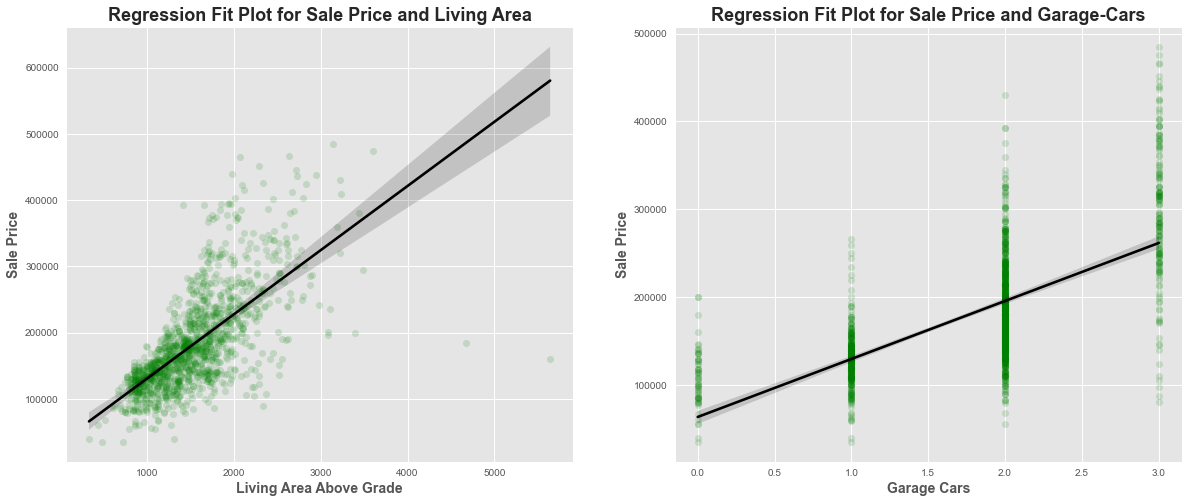

In [16]:
# CodeBlock Section 6c
plt.style.use('ggplot')
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.regplot( x='Living Area Above Grade', y='Sale Price', data= df_reg2, scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Sale Price and Living Area', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Living Area Above Grade', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

plt.subplot(122)
sns.regplot( x='Garage Cars', y='Sale Price', data= df_reg2, scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Sale Price and Garage-Cars', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Garage Cars', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

• Create a code block that create a jointplot for ‘Sales Price Predicted’.   
o kind is “reg” 
o data is df_reg2 
o ratio is 5 
o height is 8

<Figure size 1440x576 with 0 Axes>

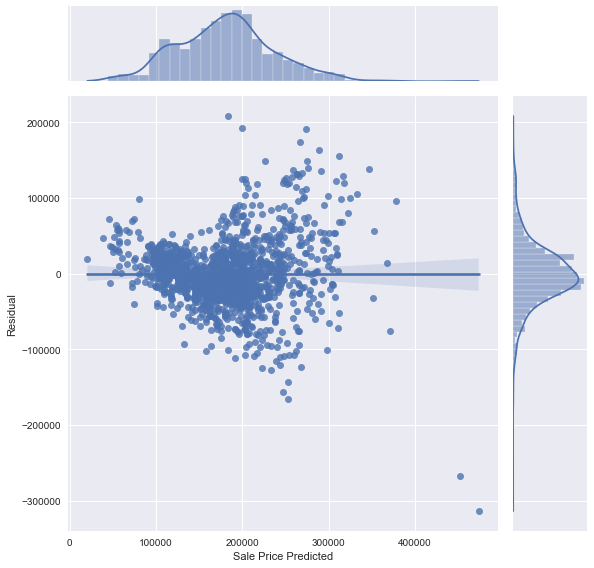

In [17]:
# CodeBlock Section 6d
 
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='Residual', x='Sale Price Predicted',kind='reg', data= df_reg2, ratio=5, height = 8)

• Create a code block that adds df_realestate[‘Kitchen Qual’] to df_reg2

In [18]:
# CodeBlock Section 6e1
df_reg2 = pd.concat([df_reg2,df_realestate['Kitchen Qual']], axis=1)
df_reg2.head()

,Living Area Above Grade,Garage Cars,Sale Price,Sale Price Predicted,Residual,Kitchen Qual
Id,,,,,,
1,1710,2,208500,203768.988587,4731.011413,Good
2,1262,2,181500,173008.762367,8491.237633,Average
3,1786,2,223500,208987.241249,14512.758751,Good
4,1717,3,140000,248612.021697,-108612.021697,Good
5,2198,3,250000,281638.068152,-31638.068152,Good


• Create a code block that creates a residplot with the following properties  
(See Figure 5): 
o x is ‘Sale Price Predicted’ 
o y is ‘Residual’ 
o col is ‘Kitchen Qual’ 
o col_wrap is 2 
o data is df_reg2  
o palette is "Set1" 
o aspect is 2 
o scatter_kws={"alpha":0.15,"s":150,"linewidth":2,"edgecolor":"white"},  
o line_kws={'color': 'red'}) 

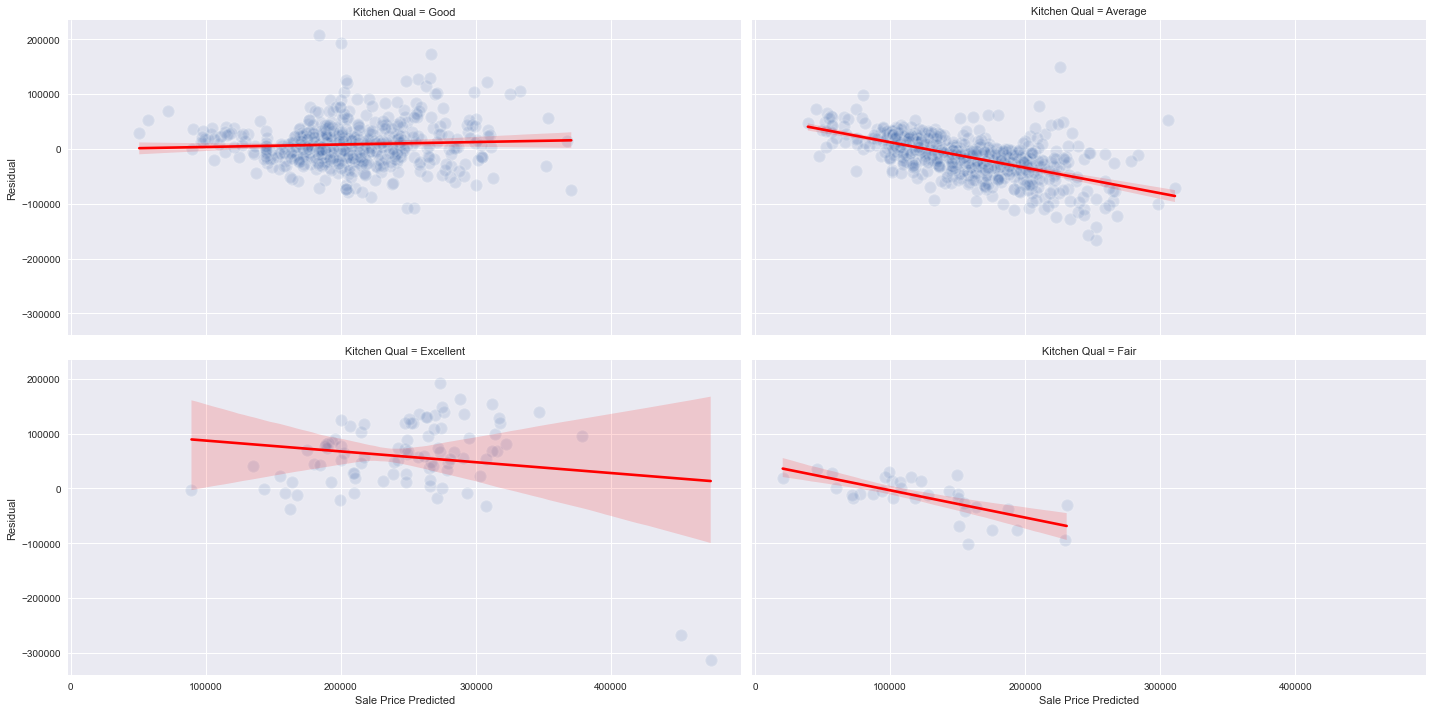

In [19]:
# CodeBlock Section 6e2

sns.lmplot( x='Sale Price Predicted', y='Residual', data= df_reg2, col='Kitchen Qual', line_kws={'color': 'red'}, aspect = 2, palette = "Set1", col_wrap = 2, scatter_kws={"alpha":0.15, "s":150,"linewidth":2,"edgecolor":"white"} )


# Code Block Section 6f: Explanation of Simple Regression Results

What is the relationship between feature and target variable? In the OLS Summary we have the Sale Price as the target variable. Living Above Grade is the feature variable. The slope of the line for the feature variables(Living Above Grade and Garage Cars) is 68.6612 and 4.436e+04. The intercept of the line is -2366.5055. The confidence level is 95% (0.975-0.025). There is a 5% of error that is distributed symmetrically with 2.5% chance the true value is smaller then the lower bound while 2.5% chance the true value is larger than the upper value. 

R Squared is 0.620 and adjusted R squared is 0.619. Both are greater than 0.5 which indicates a stronger correllation between the variables, which indicates that people are will to pay a higher price when there are more garage cars. 



What does the plots tell you about the relationship? The first plot from previous analysis shows that there is a weak correllation with sale price and living grade area where people aren't willing to pay higer price after 2000 square feet. However, the second plot for garage cars suggests that the there's a stronger corrallation, meaning that as the number of garage cars increases, the people are more willing to pay higher prices. 


Section 7a: Create Multiple Regression 
• Create a code block and execute a multiple regression using statsmodels. 
o X must include two features of your choosing. 
• Cannot include ‘Living Area Above Grade’ and ‘Garage Cars 
o y must be ‘Sale Price’. 
o Use y and X to fit the model and name the model reg3. 
o Use X to predict with the model and name it pred3. 
o Use the model (reg) to create the residuals and name it resid3. 
o Show a summary of the results.

In [20]:
# CodeBlock Section 7a
X = df_realestate['Basement Area']
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg3 = sm.OLS(y, X).fit()
pred3 = reg3.predict(X)
resid3 = reg3.resid
reg3.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     727.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.62e-129
Time:                        19:19:52   Log-Likelihood:                -17216.
No. Observations:                1390   AIC:                         3.444e+04
Df Residuals:                    1388   BIC:                         3.445e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.672e+04   4172.212     18.388      0.000    6.85e+04    8.49e+04
Basement Area    98.1321      3.639     26.970      0.000      90.994     105.270
==============================================================================
Omnibus:                      203.902   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1863.895
Skew:                           0.362   Prob(JB):                         0.00
Kurtosis:                       8.627   Cond. No.                     3.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

• Create a code block that creates a table that includes the following columns and 
name it df_reg3. 
o Include the features from the previous section and ‘Sale Price’ from 
df_realestate

In [21]:
# CodeBlock Section 7b1
df_reg3 = df_realestate[['Basement Area','Sale Price']]

df_reg3.head()

,Basement Area,Sale Price
Id,,
1,856,208500
2,1262,181500
3,920,223500
4,756,140000
5,1145,250000


• Create a code block to concatenate df_reg3, pred2, and resid2 and use the name 
df_reg3 as the final dataset. View the .head(10) for df_reg3.

In [22]:
# CodeBlock Section 7b2
df_reg3 = pd.concat([df_reg3,pred3,resid3], axis=1)
df_reg3.head(10)

,Basement Area,Sale Price,0,1
Id,,,,
1,856,208500,160720.609594,47779.390406
2,1262,181500,200562.224270,-19062.224270
3,920,223500,167001.061168,56498.938832
4,756,140000,150907.404009,-10907.404009
5,1145,250000,189080.773735,60919.226265
6,796,143000,154832.686243,-11832.686243
7,1686,307000,242170.215952,64829.784048
8,1107,200000,185351.755613,14648.244387
9,952,129900,170141.286956,-40241.286956


o Headings should be appropriate for this section.

In [23]:
# CodeBlock Section 7b2 continued
df_reg3 = df_reg3.rename(columns = {0:'Sale Price Predicted', \
                                               1: 'Residual'})
df_reg3.head(10)

,Basement Area,Sale Price,Sale Price Predicted,Residual
Id,,,,
1,856,208500,160720.609594,47779.390406
2,1262,181500,200562.224270,-19062.224270
3,920,223500,167001.061168,56498.938832
4,756,140000,150907.404009,-10907.404009
5,1145,250000,189080.773735,60919.226265
6,796,143000,154832.686243,-11832.686243
7,1686,307000,242170.215952,64829.784048
8,1107,200000,185351.755613,14648.244387
9,952,129900,170141.286956,-40241.286956


• Create a code block that create a plot of your choosing, but it should show the 
relationship between each of your features and ‘Sale Price’.  It is expected this will 
be a subplot with two plots. 
o Properties and titles are your choice.

Text(0, 0.5, 'Sale Price')

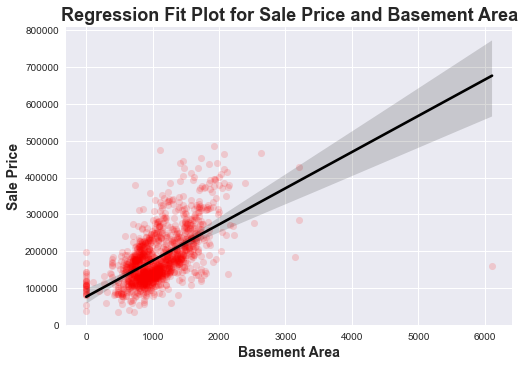

In [24]:
# CodeBlock Section 7c
sns.regplot( x='Basement Area', y='Sale Price', data= df_reg3, scatter_kws={"color":"red","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Sale Price and Basement Area', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Basement Area', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Sale Price', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

# CodeBlock Section 7d: Explanation of Simple Regression Results

Why did you choose the two features? I choose Basement Area and sales price because I was curious what the price would be based on the square footage of the basement area.

What is the relationship between the features and target variable? In the OLS Summary we have the Sale Price as the target variable. Basement Area is the feature variable. The slope of the line for the feature variable(Basement Area) is 98.1321.
The intercept of the line is 7.672e+04. The confidence level is 95% (0.975-0.025). There is a 5% of error that is distributed symmetrically with 2.5% chance the true value is smaller then the lower bound while 2.5% chance the true value is larger than the upper value. The bounds for the intercept are 6.85e+04 and 8.49e+04. The bounds for the slope are 90.994 and 105.270.

R squared is 0.344 and adjusted R squared is 0.343 which indicates a weak corrallation since it's less than 0.5 and closer to 0.

What do the plots tell you about the relationship? When the sale price is less than 200,000 it appears there is closely corrallated with less than 1000 square feet in the basement area. After this threshold, the relationship becomes weak and people are not willing to pay more in sale price when there is an increase in square feet of the basement area. 

 